##**Artificial Neural Networks**
Welcome to the last lesson of the Python and Deep Learning Bootcamp.
Now it's time to apply all the knowledge we have gained on Python and Artificial Neural Networks to recognize the hand written digits in an image. 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import numpy as np

###<b> Creating dataset for an And Gate</b>

In [2]:
x = np.array([[0,0], [0,1], [1,0], [1,1]], "uint8")
y  = np.array([[0], [0], [0], [1]], "uint8")

### CREATING A SEQUENTIAL MODEL USING TENSORFLOW

In [3]:
model = Sequential()
model.add(Dense(units=1, activation='sigmoid',input_dim=2))   ## MODEL CONTAINS ONLY ONE OUTPUT NEURON
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


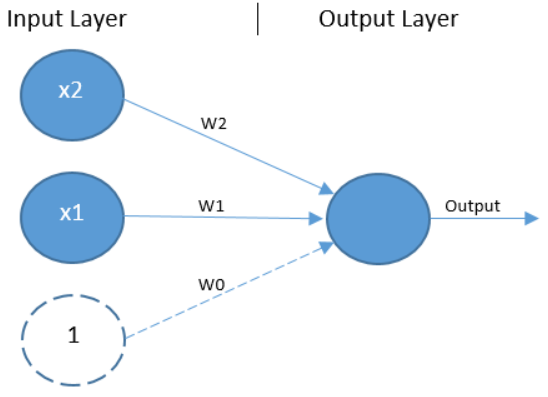

In [4]:
model.fit(x, y, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 734ms/step - loss: 0.7758 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.7752 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7746 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7740 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7733 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7727 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.7721 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 6ms/step - loss: 0.7715 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7709 - accuracy: 0.5000
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.7702 - accuracy: 0.5000
Epoch 11/50
1/1 [====================

In [5]:
print(model.layers[0].get_weights())

[array([[0.8617574],
       [0.375055 ]], dtype=float32), array([-0.04968516], dtype=float32)]


In [6]:
model.predict(x)

array([[0.48758125],
       [0.5806323 ],
       [0.6925509 ],
       [0.7662269 ]], dtype=float32)

### CREATING DATABASE FOR A XOR GATE

In [7]:
x = [[0,0], [0,1], [1,0], [1,1]]
y = [[0], [1], [1], [0]]

In [8]:
xor = Sequential()
xor.add(Dense(2, input_dim=2, activation='sigmoid'))  # hidden layer with 2 neurons
xor.add(Dense(1, activation='sigmoid'))    # output layer with 1 neuron
xor.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
xor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


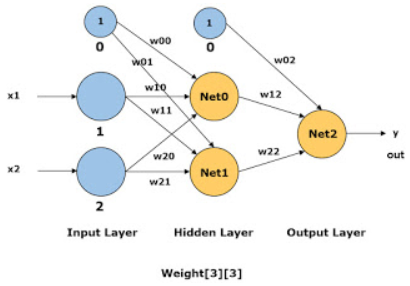

In [ ]:
xor.fit(x, y, epochs=5000)

In [10]:
xor.get_weights()

[array([[-0.7314753 , -0.20463033],
        [ 0.34033355, -0.41993994]], dtype=float32),
 array([-0.18772125, -0.17556955], dtype=float32),
 array([[-0.7002349 ],
        [-0.03369809]], dtype=float32),
 array([0.26187536], dtype=float32)]

In [11]:
xor.predict(x)

array([[0.48229498],
       [0.46832204],
       [0.5121324 ],
       [0.4999772 ]], dtype=float32)

### Deep Neural Network to Predict hand written Digit Recognition

In [16]:
## IMPORTING DATASET

from sklearn.datasets import load_breast_cancer
Data = load_breast_cancer()

In [33]:
print(Data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [19]:
features = Data.data
target = Data.target

print(features.shape)
print(target.shape)

(569, 30)
(569,)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(32, input_dim = 30, activation='relu'))  ## hidden layer 1
model.add(Dense(64, activation='relu'))  ## hidden layer 2
model.add(Dense(1, activation='sigmoid')) 

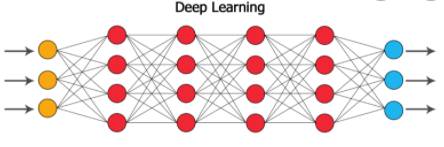

In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 3,169
Trainable params: 3,169
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
15/15 [==============================] - 14s 2ms/step - loss: 44.4607 - accuracy: 0.3686
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 4.9132 - accuracy: 0.6182
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8418
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8835
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9086
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8935
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.9159
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9208
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.9073
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9238


In [39]:
scores = model.evaluate(X_test, y_test)
print(scores)   ## returns loss and accuracy

4/4 [==============================] - 0s 4ms/step - loss: 0.2855 - accuracy: 0.8947
[0.2854916751384735, 0.8947368264198303]


In [40]:
predictions = model.predict(X_test)
label=[]
for pred in predictions:
  if pred>=0.5:
    print("Malignent")
  else:
    print("Benign")

Malignent
Malignent
Malignent
Malignent
Benign
Malignent
Malignent
Malignent
Malignent
Malignent
Benign
Malignent
Malignent
Benign
Malignent
Benign
Malignent
Benign
Malignent
Malignent
Malignent
Malignent
Malignent
Malignent
Malignent
Malignent
Benign
Malignent
Malignent
Benign
Malignent
Benign
Benign
Malignent
Malignent
Malignent
Malignent
Malignent
Malignent
Malignent
Benign
Benign
Malignent
Malignent
Benign
Benign
Malignent
Benign
Malignent
Benign
Malignent
Benign
Malignent
Malignent
Malignent
Benign
Benign
Malignent
Malignent
Benign
Benign
Malignent
Malignent
Benign
Malignent
Malignent
Benign
Malignent
Benign
Malignent
Malignent
Malignent
Benign
Benign
Malignent
Benign
Malignent
Malignent
Benign
Malignent
Benign
Benign
Malignent
Benign
Malignent
Benign
Malignent
Malignent
Malignent
Benign
Benign
Malignent
Malignent
Malignent
Malignent
Benign
Malignent
Benign
Benign
Malignent
Malignent
Malignent
Malignent
Benign
Benign
Malignent
Malignent
Malignent
Malignent
Benign
Malignent
Maligne